<a href="https://colab.research.google.com/github/Santigs/DS-Course/blob/main/Lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# make sure you have installed the api
# pip install pycoingecko
# https://github.com/man-c/pycoingecko
!pip install pycoingecko

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pycoingecko import CoinGeckoAPI

In [ ]:
cg = CoinGeckoAPI()
# Getting bitcoin price: cg.get_price(ids='bitcoin', vs_currencies='usd')
# Getting list of coins: cg.get_coins_list()

coinlist = cg.get_coins_list()
coinlist


In [ ]:
# Fetching currency data
currency = 'badger-dao'
#currency = 'honey'
data = cg.get_coin_by_id(currency)

In [ ]:
# Getting current price and ath date & price
name = data['id']
market_data = data['market_data']
current_price = market_data['current_price']
all_time_high = market_data['ath']
ath_date = market_data['ath_date']
total_volume = market_data['total_volume']


price_usd = current_price['usd']
price_ath = all_time_high['usd']
date_ath = ath_date['usd']
volume_usd = total_volume['usd']

# Printing values 

print(name)
print('Current price: %3.4f USD' %price_usd)
print('Ath price: %3.4f USD' %price_ath)
print('Ath date: ',date_ath[0:10],'at', date_ath[11:19])
print('Volume: %8.2f USD' %volume_usd)

badger-dao
Current price: 20.6400 USD
Ath price: 25.3700 USD
Ath date:  2021-01-27 at 01:30:16
Volume: 54966491.00 USD


In [ ]:
# Fetch coin contract info from coingecko
# cg.get_coin_info_from_contract_address_by_id('honey')

ticker = cg.get_coin_ticker_by_id(currency)



# extract exchanges and volume
exchanges = pd.DataFrame(ticker['tickers'])
converted_volumes = exchanges['converted_volume']


# create a dataframe with volume trades per market per currency pair in usd
traded_volume = pd.DataFrame(columns=['Exchange', 'Pair', 'Amount'])
for num, volume in enumerate(converted_volumes):
    traded_volume = traded_volume.append({'Exchange': exchanges.iloc[num][2]['name'], 
                                          'Pair': exchanges.iloc[num][1], 
                                          'Amount': volume['usd']}, ignore_index=True)
    
    

    
#traded_volume.set_index('Exchange',inplace=True)
traded_volume

,Exchange,Pair,Amount
0,Uniswap (v2),ETH,12524051
1,Sushiswap,ETH,8116263
2,Huobi Global,USDT,12524433
3,MXC,USDT,6861322
4,OKEx,USDT,3012683
5,MXC,BTC,5649746
6,BiKi,USDT,501559
7,Huobi Global,ETH,352326
8,Huobi Global,BTC,359231
9,Gate.io,USDT,191680


In [ ]:
traded_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exchange  25 non-null     object 
 1   Pair      25 non-null     object 
 2   Amount    25 non-null     float64
dtypes: float64(1), object(2)
memory usage: 728.0+ bytes


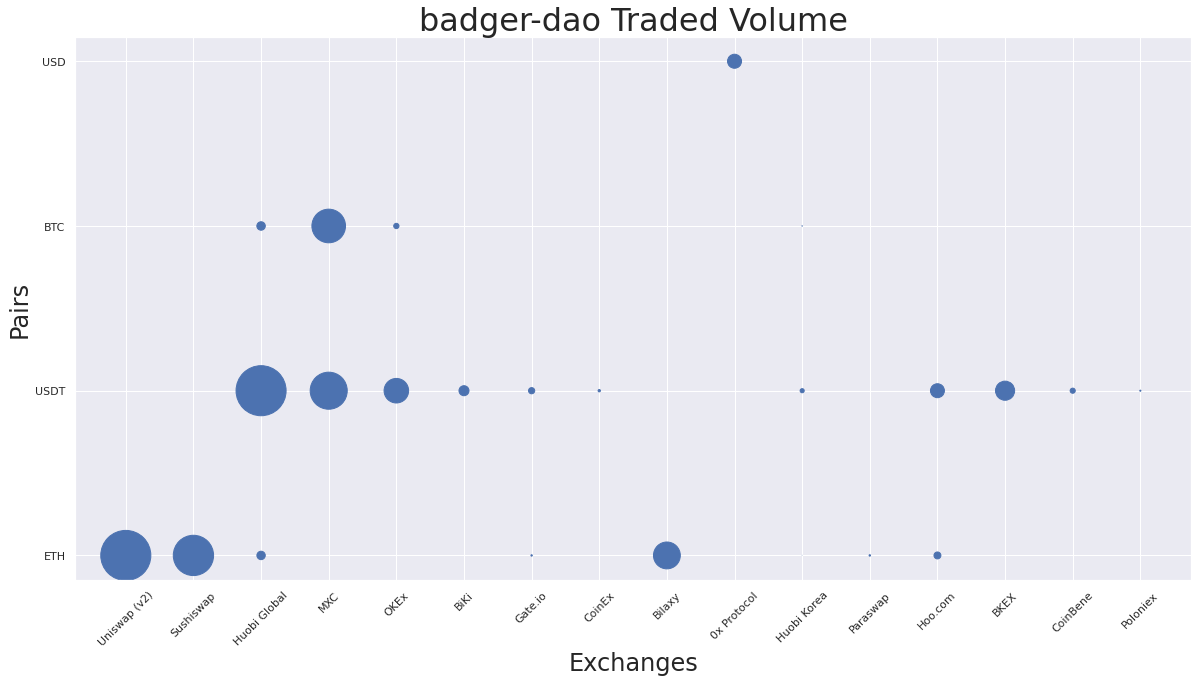

In [ ]:
#create a new dataframe to convert amount values from string to numeric
traded_df= pd.DataFrame(traded_volume)
traded_df['Amount']=pd.to_numeric(traded_df['Amount'])

#create a scatter chart
plt.figure(figsize=(20,10))
plt.xlabel('Exchanges', fontsize=24)
plt.ylabel('Pairs', fontsize=24)
plt.title(name+' Traded Volume', fontsize=32)
plt.xticks(rotation=45)
graph = plt.scatter(traded_df['Exchange'], traded_df['Pair'], s=traded_df['Amount']/5000, cmap='Blues')


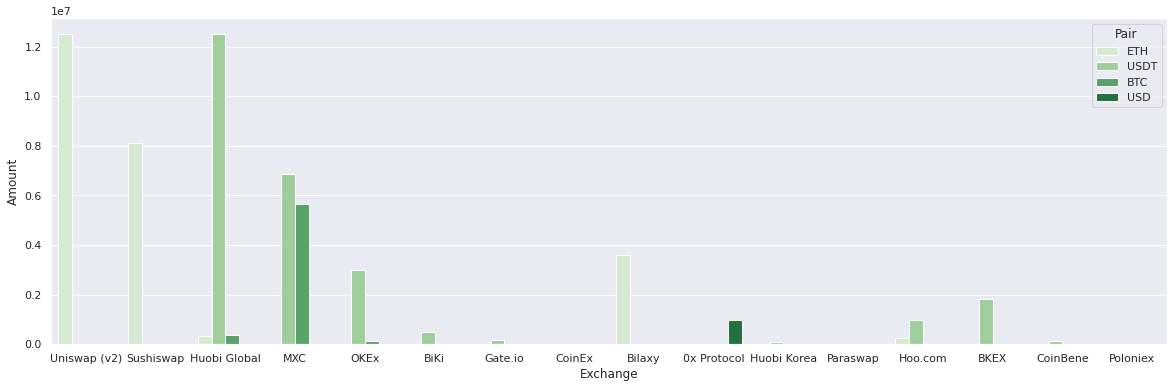

In [ ]:
fig= plt.figure(figsize=(20,6))
graph = sns.barplot(x = 'Exchange', y = 'Amount', hue='Pair' , data = traded_df, palette = 'Greens', edgecolor = 'w')

In [ ]:
# Fetching last days of data
# https://github.com/man-c/pycoingecko/blob/master/pycoingecko/api.py

chart_data= cg.get_coin_market_chart_by_id(currency, 'usd', 30)

In [ ]:
# Generate dataframe for price and volume
data_price = pd.DataFrame(chart_data['prices'])
data_volume = pd.DataFrame(chart_data['total_volumes'])
data_price.columns = ['Date', 'Price']
data_volume.columns = ['Date', 'Volume']
data_price = data_price.join(data_volume['Volume'])


data_price['Date'] = pd.to_datetime(data_price['Date'], unit='ms')
data_price['new_formatted_date'] = data_price.Date.dt.strftime('%d/%m/%y %H:%M:%S')


data_price
#data_price.to_csv(name+'_price_data.csv', index = False)


,Date,Price,Volume,new_formatted_date
0,2020-12-28 15:08:57.068,5.565012,1.359432e+06,28/12/20 15:08:57
1,2020-12-28 16:07:48.086,5.336434,1.313633e+06,28/12/20 16:07:48
2,2020-12-28 17:08:01.327,5.313127,1.374954e+06,28/12/20 17:08:01
3,2020-12-28 18:07:58.213,5.407887,1.270714e+06,28/12/20 18:07:58
4,2020-12-28 19:07:56.546,5.280298,1.180679e+06,28/12/20 19:07:56
...,...,...,...,...
713,2021-01-27 11:07:45.653,22.706941,6.213053e+07,27/01/21 11:07:45
714,2021-01-27 12:16:43.856,22.036901,6.021729e+07,27/01/21 12:16:43
715,2021-01-27 13:04:44.279,21.633314,5.944902e+07,27/01/21 13:04:44
716,2021-01-27 14:17:33.850,20.952722,5.726891e+07,27/01/21 14:17:33


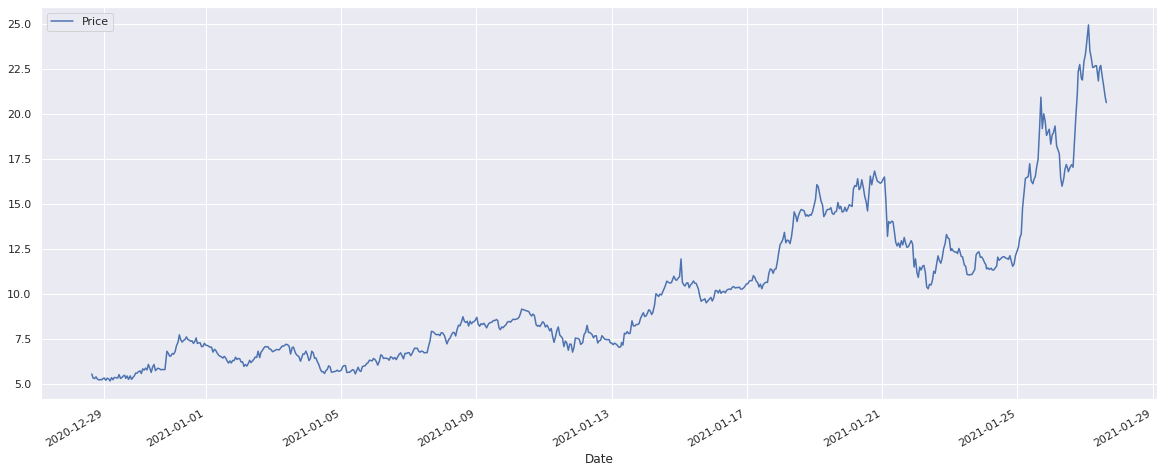

In [ ]:
# Creating a price chart

graph1 = data_price.plot(x='Date', y='Price', figsize=(20,8), color='b')


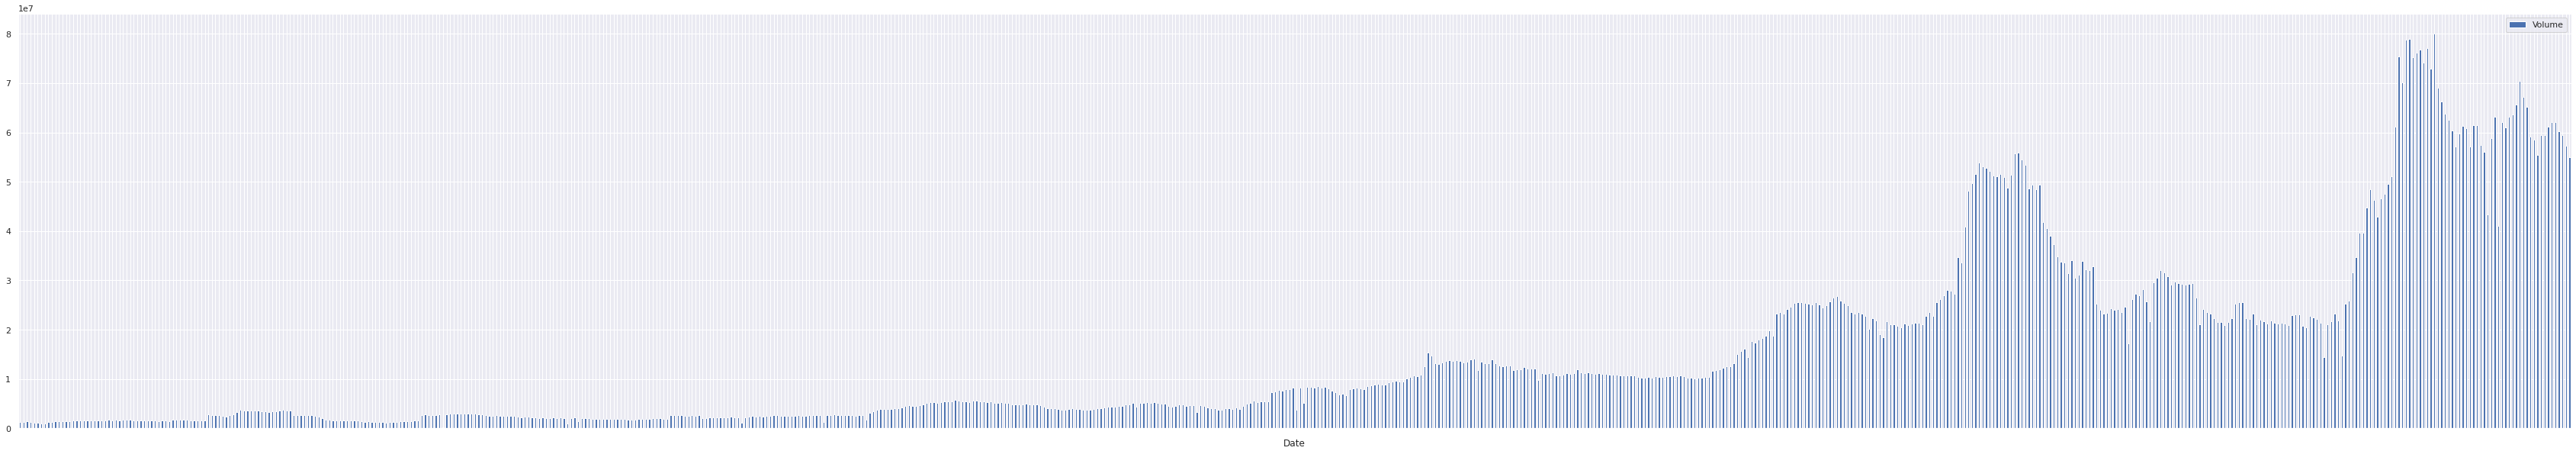

In [ ]:
# Creating a Volume bar chart

graph2 = data_volume.plot.bar(x='Date', y='Volume', figsize=(60,10), color='b')
graph2.xaxis.set_major_formatter(plt.NullFormatter())

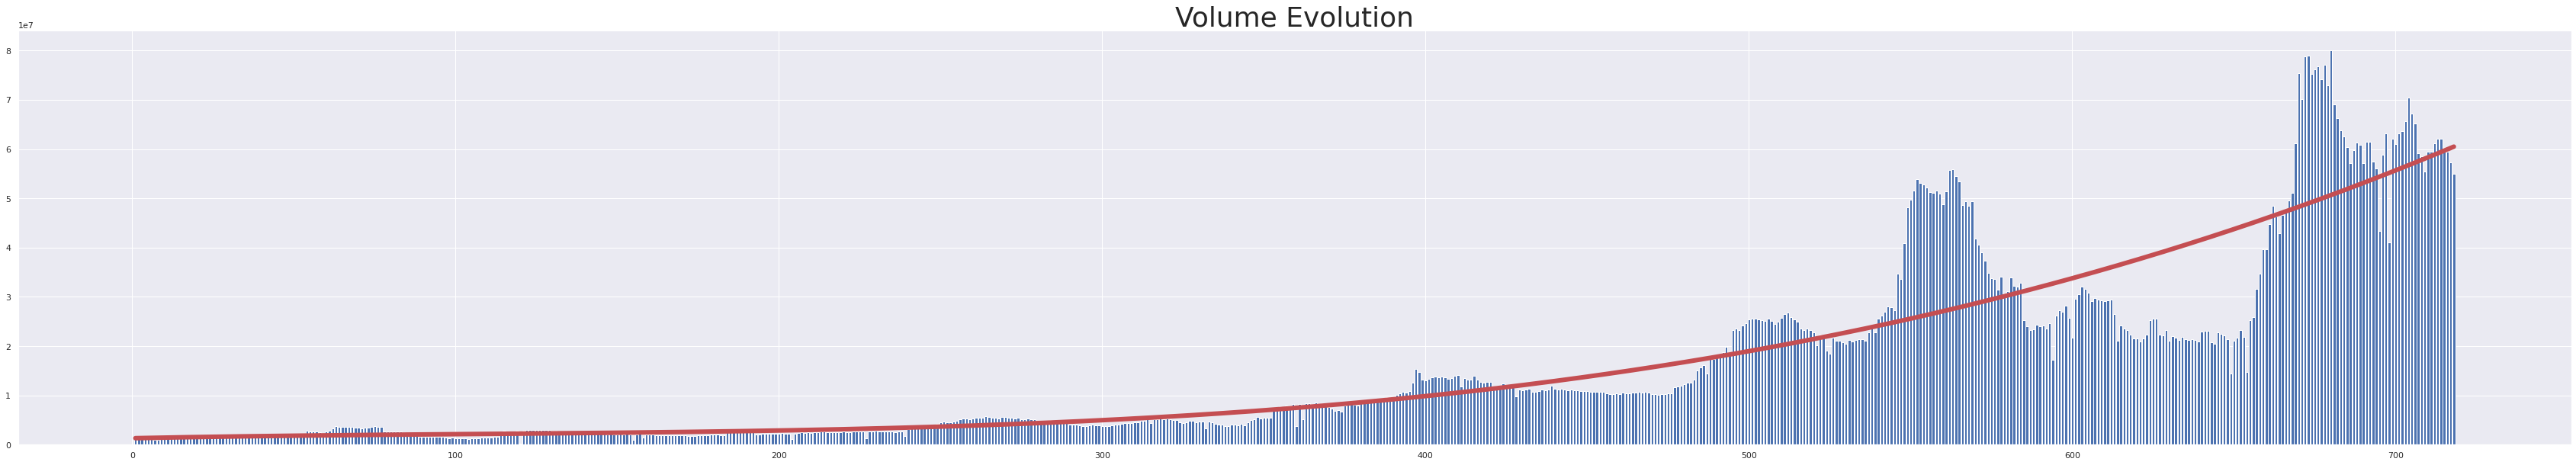

In [ ]:
# Fitting a polynomial curve
# to show volume trend

length = len(data_volume['Date'])


x = np.linspace(1, length, length)
y = data_volume['Volume']



p3 = np.polyfit(x, y,3)
xpoly = np.linspace(1, length, length)
ypoly = np.polyval(p3, xpoly)



graph3 = plt.figure(figsize=(60,10))
graph3 = plt.bar(x,y)
graph3 = plt.plot(xpoly, ypoly, color='r', linewidth=6)
graph3 = plt.title('Volume Evolution', fontsize=36)





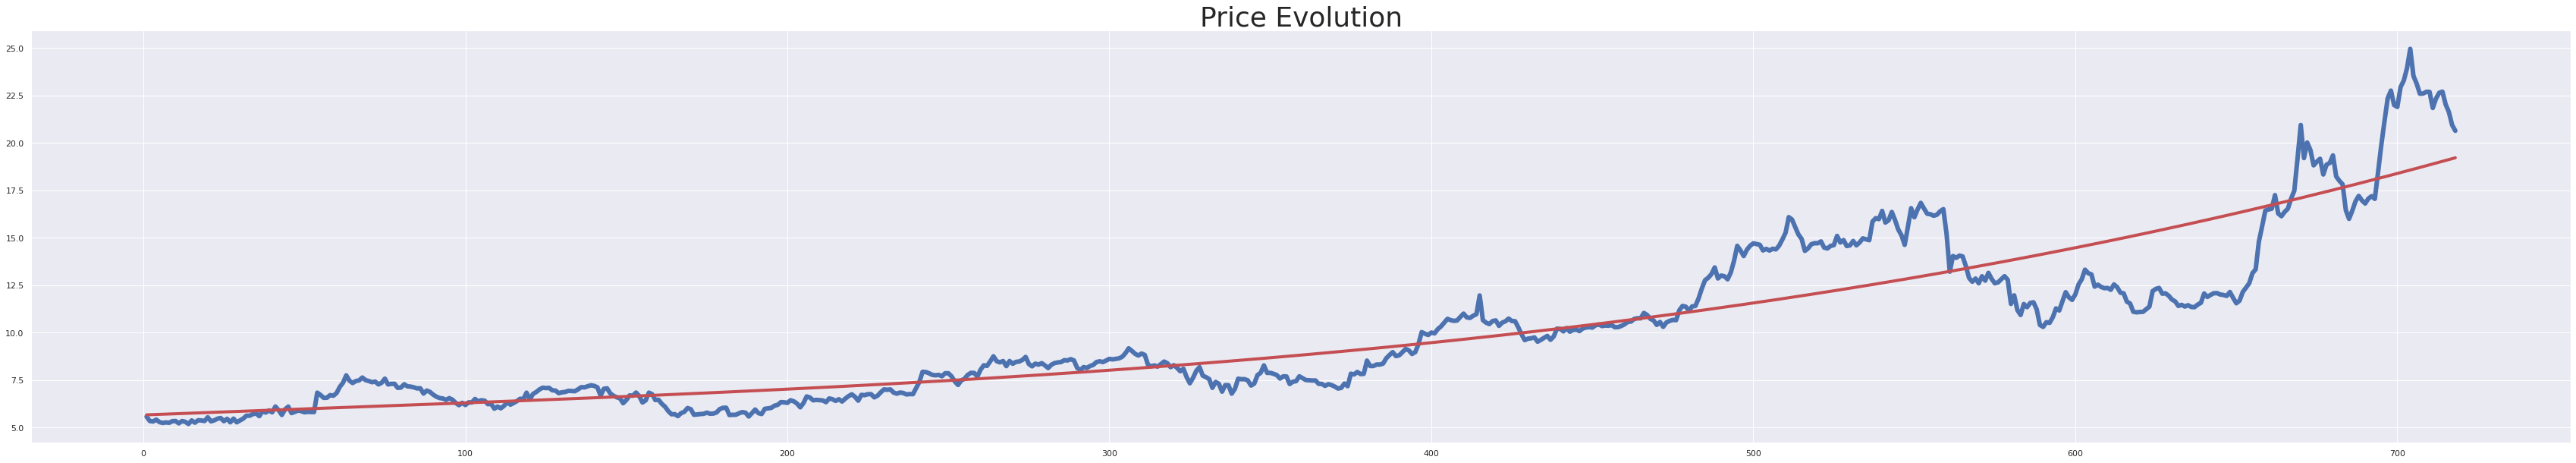

In [ ]:
# Fitting a polynomial curve
# to show price trend

length = len(data_price['Date'])

x = np.linspace(1, length, length)
y = data_price['Price']


p3 = np.polyfit(x, y,3)
xpoly = np.linspace(1, length, length)
ypoly = np.polyval(p3, xpoly)

graph4 = plt.figure(figsize=(60,10))
graph4 = plt.title('Price Evolution', fontsize=36)
graph4 = plt.plot(x, y, linewidth=6)
graph4 = plt.plot(xpoly, ypoly, color='r', linewidth=4)

#labels = data_price['Date'].tolist()




### Animating a graph

In [ ]:
import random
from itertools import count
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import figure

In [ ]:
#This cell will not work on google colab
#You need to run it in your local machine with jupyter

%matplotlib notebook
import matplotlib.animation as animation
from matplotlib import rcParams


#plt.style.use('fivethirtyeight')
params = {'figure.figsize': (10, 5),
         'xtick.labelsize':'x-small',
         'ytick.labelsize':'x-small',
         }
plt.rcParams.update(params)
plt.xticks(rotation=30)

labels = []
x_vals = []
y_vals = []
y_h = data_price['Price']



index = count()

def animate(i):
    num = next(index)
    dia = data_price['new_formatted_date'][num]
    
    #labels.append(dia[1:8])
    #plt.set_xticklabels(labels)
    
    x_vals.append(data_price['Date'][num])
    y_vals.append(y_h[num])
   

    plt.cla()
    plt.xticks(rotation=30)
    #plt.xlabel('xlabel', fontsize=10)
    plt.plot(x_vals, y_vals, linewidth=2.0, color='red', label='currency')
    
    plt.legend(loc='upper left')
    plt.tight_layout
    
   


ani = FuncAnimation(plt.gcf(), animate, interval=1)


plt.plot(x_vals, y_vals)


plt.tight_layout()
plt.show()

#ani.save('myAnimation.gif', writer='imagemagick', fps=30)
#https://riptutorial.com/matplotlib/example/23577/interactive-controls-with-matplotlib-widgets
#https://www.google.com/search?q=jupyter+animate+matplotlib&oq=jupyter+animat&aqs=chrome.3.69i57j0l7.6679j0j7&sourceid=chrome&ie=UTF-8#kpvalbx=_oVGLXqPjIMiHjLsPsYqAqA820

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>